In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from decimal import Decimal

A = 1

In [2]:
def evaluate_periodic_sine_and_a_half(time_array : list, v_max):
    V_MAX = v_max
    res = []
    for t in time_array:
        t_in_oritginal_period = float(Decimal(str(t)) % Decimal(str(3*np.pi)))

        if t_in_oritginal_period > 0:
            y = V_MAX * np.sin(t_in_oritginal_period)
        else:
            y = V_MAX * np.sin(t_in_oritginal_period + 3*np.pi)
        res.append(y)
    return res

In [3]:
def evaluate_periodic_exp(time_array : list, v_max):
    V_MAX = v_max
    res = []
    for t in time_array:
        t_in_oritginal_period = float(Decimal(str(t)) % Decimal('10'))

        if t_in_oritginal_period < 0:
            t_in_oritginal_period = 10 - t_in_oritginal_period

        if t_in_oritginal_period < 5:
            y = V_MAX * np.e**(-np.abs(t_in_oritginal_period))
        else:
            y = V_MAX * np.e**(-np.abs(t_in_oritginal_period - 10))
            
        res.append(y)
    return res

In [4]:
t_A = np.arange(-0.002, 0.006, 0.00005)
t_B1 = np.arange(-3*np.pi, 12*np.pi, 3*np.pi/100)
t_B2 = np.arange(-5, 45, 0.2)
t_C = np.arange(-0.002, 0.012, 0.00005)

x_A = A * np.cos(2 * np.pi * 0.5e3 * t_A)
x_B1 = evaluate_periodic_sine_and_a_half(t_B1, A)
x_B2 = evaluate_periodic_exp(t_B2, A)
x_C = A * (0.5 * np.cos(2*np.pi * 0.9e3 * t_C) + np.cos(2*np.pi * 1e3 * t_C) + 0.5 * np.cos(2*np.pi * 1.1e3 * t_C))

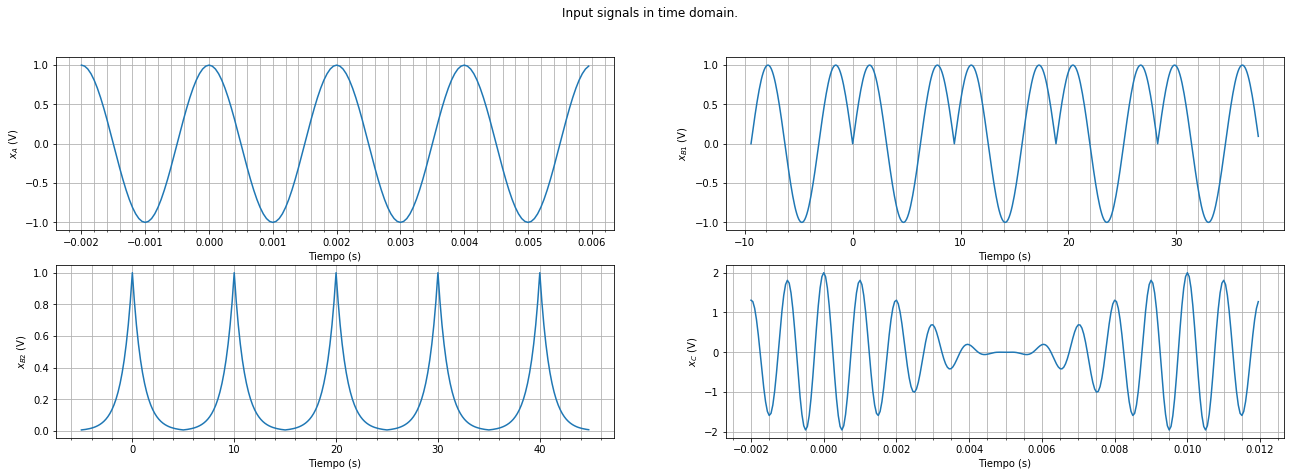

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 7))
fig.suptitle('Input signals in time domain.')

ax1.plot(t_A, x_A)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.grid(True, which='both')
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('$ x_A $ (V)')

ax2.plot(t_B1, x_B1)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.grid(True, which='both')
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('$ x_{B1} $ (V)')

ax3.plot(t_B2, x_B2)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.grid(True, which='both')
ax3.set_xlabel('Tiempo (s)')
ax3.set_ylabel('$ x_{B2} $ (V)')

ax4.plot(t_C, x_C)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.grid(True, which='both')
ax4.set_xlabel('Tiempo (s)')
ax4.set_ylabel('$ x_C $ (V)')

fig.show()

In [11]:
X_A = np.fft.fft(x_A) / len(x_A)
X_A = X_A[range(int(len(x_A)/2))]

X_B1 = np.fft.fft(x_B1) / len(x_B1)
X_B1 = X_B1[range(int(len(x_B1)/2))]

X_B2 = np.fft.fft(x_B2) / len(x_B2)
X_B2 = X_B2[range(int(len(x_B2)/2))]

X_C = np.fft.fft(x_C) / len(x_C)
X_C = X_C[range(int(len(x_C)/2))]



f_A = np.fft.fftfreq(t_A.shape[-1])
f_B1 = np.fft.fftfreq(t_B1.shape[-1])
f_B2 = np.fft.fftfreq(t_B2.shape[-1])
f_C = np.fft.fftfreq(t_C.shape[-1])

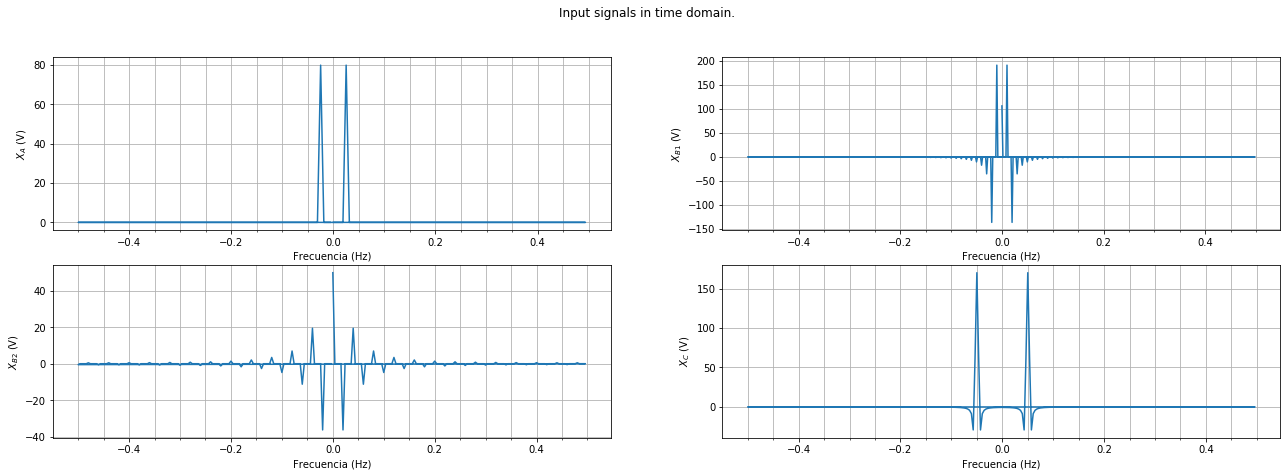

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 7))
fig.suptitle('Input signals in time domain.')

ax1.plot(f_A, X_A)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.grid(True, which='both')
ax1.set_xlabel('Frecuencia (Hz)')
ax1.set_ylabel('$ X_A $ (V)')

ax2.plot(f_B1, X_B1)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.grid(True, which='both')
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('$ X_{B1} $ (V)')

ax3.plot(f_B2, X_B2)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.grid(True, which='both')
ax3.set_xlabel('Frecuencia (Hz)')
ax3.set_ylabel('$ X_{B2} $ (V)')

ax4.plot(f_C, X_C)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.grid(True, which='both')
ax4.set_xlabel('Frecuencia (Hz)')
ax4.set_ylabel('$ X_C $ (V)')

fig.show()